# importing library

In [1]:

import numpy as np
import glob as gb
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
from skimage.transform import AffineTransform, warp
from skimage import io, img_as_ubyte
from sklearn import preprocessing
from sklearn import  metrics
from sklearn import svm
import random
import os
import cv2
import glob
import seaborn as sb
from sklearn.metrics import confusion_matrix
%matplotlib inline


# spliting folders

In [2]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [125]:
import splitfolders
splitfolders.ratio('E:\mydataset\IMAG\Dataset', output="E:\mydataset\IMAG", seed=1337, ratio=(.7, 0.3))

Copying files: 11007 files [00:40, 271.01 files/s]


# loading my data

In [2]:
p="E:\\mydataset\\IMAG\\train\\"
class_names = sorted(os.listdir(p))
n_classes = len(class_names)

# Class Distribution
class_dis = [len(os.listdir(p + name)) for name in class_names]


# Show
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")

Total Number of Classes : 36 
Class Names : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Exploring my dataset

In [3]:
z = sorted(os.listdir('E:\\mydataset\\IMAG\\train\\'))
for n in z:
    count = len(os.listdir(f'E:\\mydataset\\IMAG\\train\\{n}'))
    print(f'{n} images={count}')

0 images=98
1 images=149
2 images=127
3 images=112
4 images=149
5 images=149
6 images=149
7 images=149
8 images=149
9 images=149
A images=299
B images=299
C images=249
D images=238
E images=219
F images=251
G images=254
H images=271
I images=272
J images=271
K images=208
L images=214
M images=280
N images=222
O images=192
P images=299
Q images=299
R images=299
S images=228
T images=109
U images=230
V images=244
W images=227
X images=194
Y images=210
Z images=227


In [4]:
z = sorted(os.listdir('E:\\mydataset\\IMAG\\val\\'))
for n in z:
    count = len(os.listdir(f'E:\\mydataset\\IMAG\\val\\{n}'))
    print(f'{n} images={count}')

0 images=43
1 images=65
2 images=55
3 images=48
4 images=65
5 images=65
6 images=65
7 images=65
8 images=65
9 images=65
A images=129
B images=129
C images=107
D images=103
E images=95
F images=109
G images=109
H images=117
I images=117
J images=117
K images=90
L images=92
M images=121
N images=96
O images=83
P images=129
Q images=129
R images=129
S images=98
T images=47
U images=99
V images=106
W images=98
X images=84
Y images=90
Z images=98


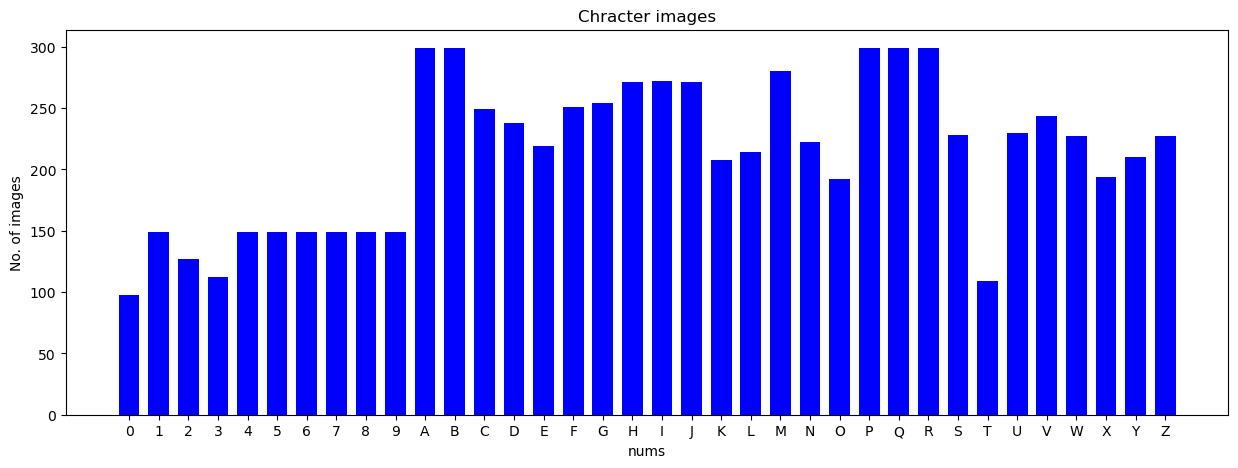

In [5]:
num = sorted(os.listdir('E:\\mydataset\\IMAG\\train\\'))
values = [len(os.listdir(f'E:\\mydataset\\IMAG\\train\\{n}')) for n in num]
fig = plt.figure(figsize = (15, 5))
plt.bar(num, values, color ='blue',
        width = 0.7)

plt.xlabel("nums")
plt.ylabel("No. of images")
plt.title("Chracter images")
plt.show()

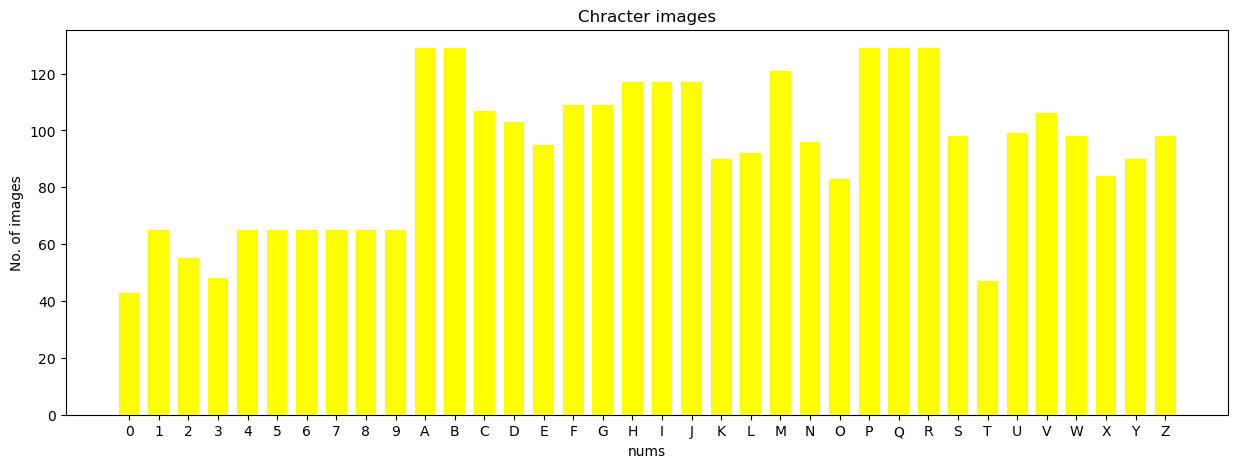

In [6]:
num = sorted(os.listdir('E:\\mydataset\\IMAG\\val\\'))
values = [len(os.listdir(f'E:\\mydataset\\IMAG\\val\\{n}')) for n in num]
fig = plt.figure(figsize = (15, 5))
plt.bar(num, values, color ='yellow',
        width = 0.7)

plt.xlabel("nums")
plt.ylabel("No. of images")
plt.title("Chracter images")
plt.show()

In [7]:

fig = px.pie(names=class_names, values=class_dis, title="Training Class Distribution")
fig.update_layout({'title':{'x':0.48}})

fig.show()

# Showing sizes of images 

In [135]:

si = []
for folder in  os.listdir('E:\\mydataset\\IMAG\\train\\') : 
    files = gb.glob(pathname= str( 'E:\\mydataset\\IMAG\\train\\' + folder + '/*.png'))
    print(folder)
    for file in files: 
        image = plt.imread(file)
        si.append(image.shape)
pd.Series(si).value_counts()

0
1
2
3
4
5
6
7
8
9
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


(128, 128)        6903
(900, 1200, 3)     285
(60, 42, 3)          3
(61, 34, 3)          3
(22, 26, 3)          2
                  ... 
(213, 149, 3)        1
(147, 91, 3)         1
(191, 72, 3)         1
(362, 154, 3)        1
(156, 141, 3)        1
Length: 476, dtype: int64

# Will resize images in 128*128

In [9]:
size=128
d=sorted(os.listdir('E:\\mydataset\\IMAG\\train\\'))
l='E:\\mydataset\\IMAG\\train\\'
l+d[0]


'E:\\mydataset\\IMAG\\train\\0'

In [10]:
from IPython.lib.display import join
xt_img=[]
yt_img=[]
for ds in d:
  m=ds.split("\\")[-1]
  print(m)


  for img in glob.glob(os.path.join(l+ds,"*.png")):
    print(img)
    im=cv2.imread(img,cv2.IMREAD_COLOR)
    im=cv2.resize(im,(size,size))
    xt_img.append(im)
    yt_img.append(sorted(m))

0
E:\mydataset\IMAG\train\0\img001-00088.png
E:\mydataset\IMAG\train\0\img001-00089.png
E:\mydataset\IMAG\train\0\img001-00091.png
E:\mydataset\IMAG\train\0\img001-00092.png
E:\mydataset\IMAG\train\0\img001-00093.png
E:\mydataset\IMAG\train\0\img001-00104.png
E:\mydataset\IMAG\train\0\img001-00105.png
E:\mydataset\IMAG\train\0\img001-00179.png
E:\mydataset\IMAG\train\0\img001-00180.png
E:\mydataset\IMAG\train\0\img001-00192.png
E:\mydataset\IMAG\train\0\img001-00407.png
E:\mydataset\IMAG\train\0\img001-00408.png
E:\mydataset\IMAG\train\0\img001-00409.png
E:\mydataset\IMAG\train\0\img001-00410.png
E:\mydataset\IMAG\train\0\img001-00413.png
E:\mydataset\IMAG\train\0\img001-00414.png
E:\mydataset\IMAG\train\0\img001-00415.png
E:\mydataset\IMAG\train\0\img001-00416.png
E:\mydataset\IMAG\train\0\img001-00418.png
E:\mydataset\IMAG\train\0\img001-00419.png
E:\mydataset\IMAG\train\0\img001-00420.png
E:\mydataset\IMAG\train\0\img001-00422.png
E:\mydataset\IMAG\train\0\img001-00617.png
E:\mydata

# show ranomly images

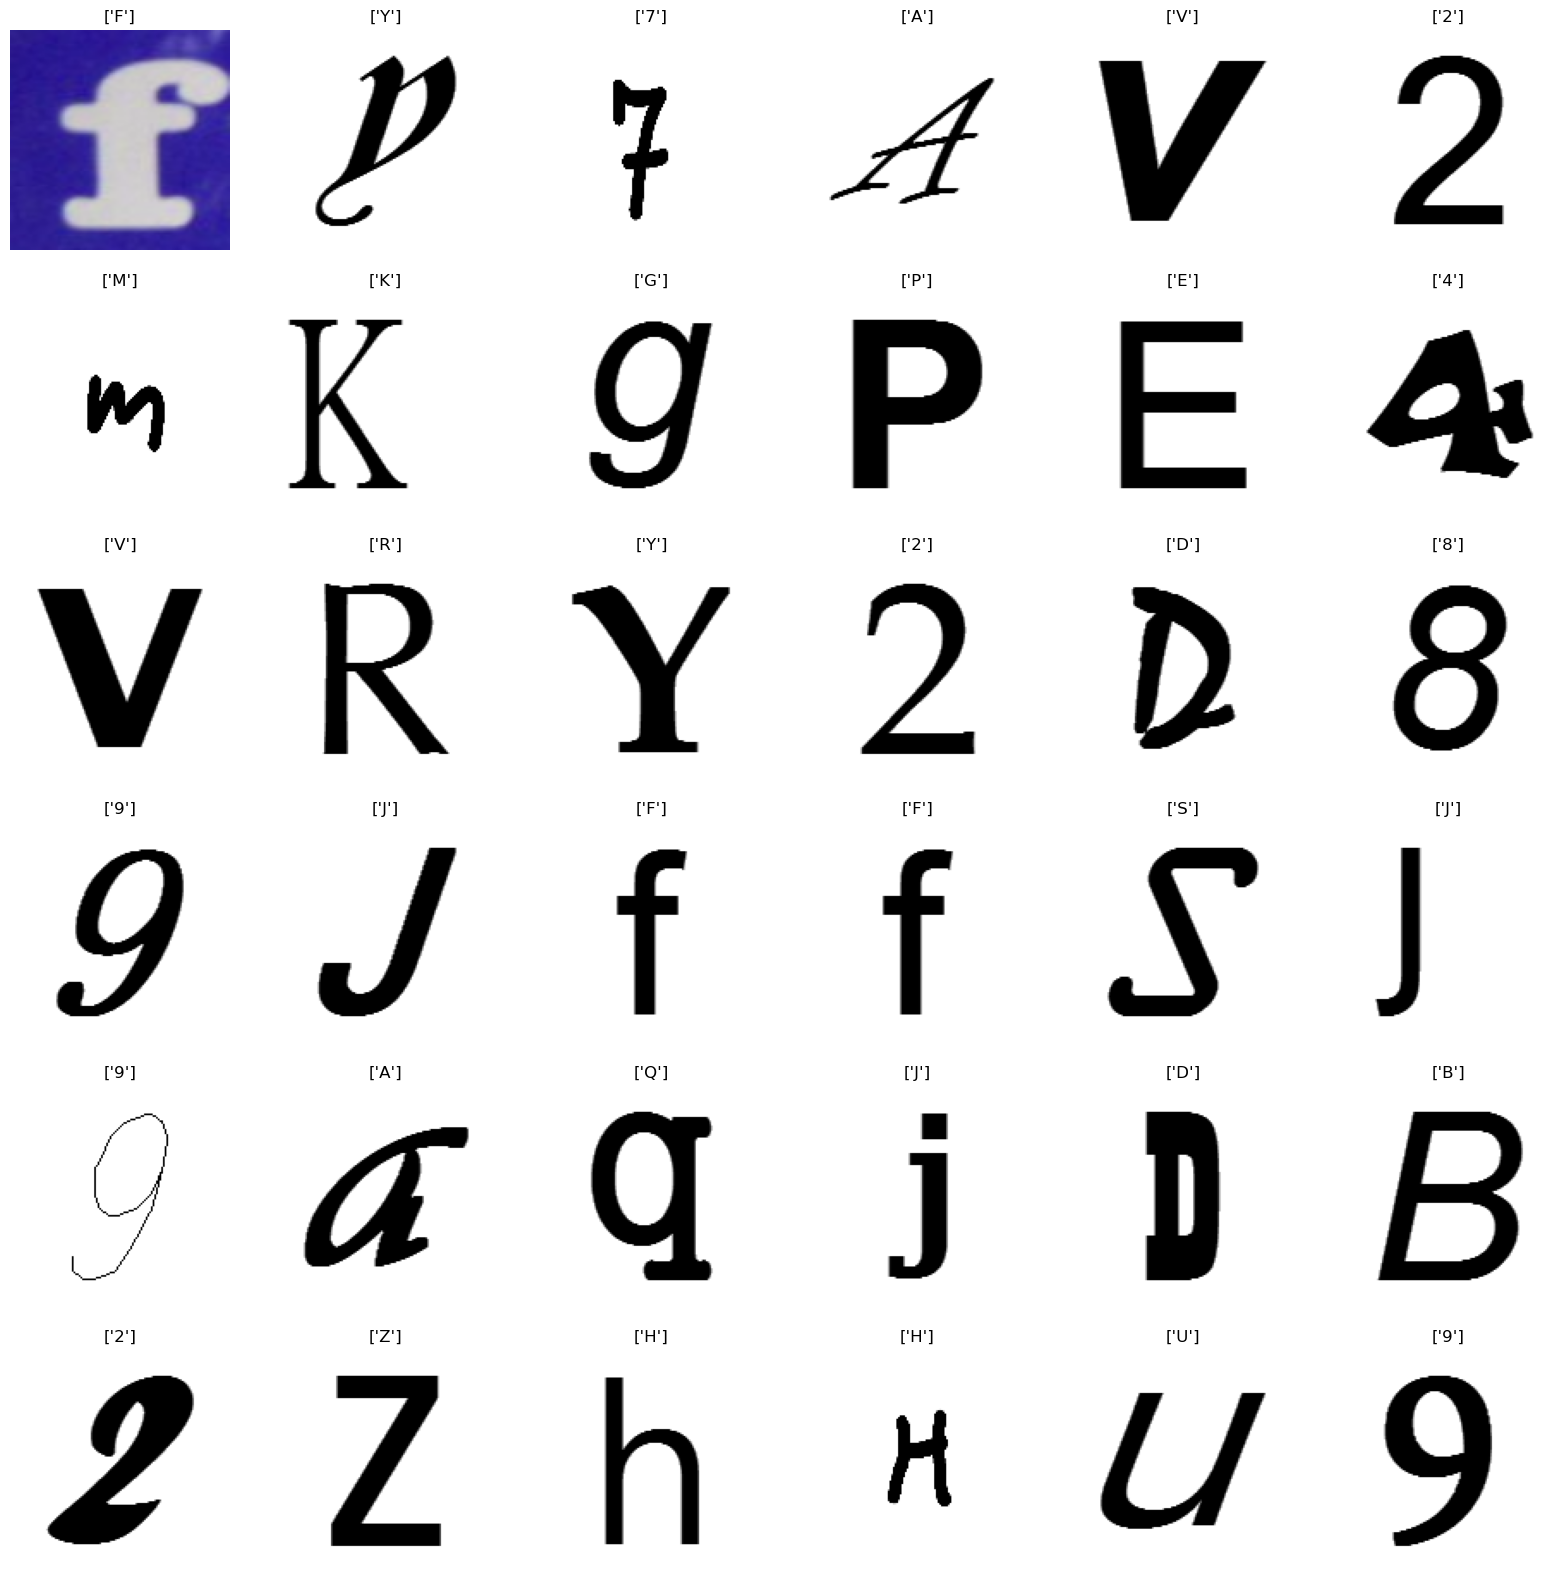

In [12]:
data=xt_img
import random
plt.figure(figsize=(20,20))
for i,j in enumerate(list(np.random.randint(0,len(data),36))):
  plt.subplot(6,6,i+1)
  plt.title(yt_img[j])
  plt.axis('off')  
  plt.imshow(data[j])

In [13]:
xt_img=np.array(xt_img)
yt_img=np.array(yt_img)

In [14]:
print(xt_img.shape)
print(yt_img.shape)

(7685, 128, 128, 3)
(7685, 1)


In [15]:
size=128
b='E:\\mydataset\\IMAG\\val\\'
from IPython.lib.display import join
xte_img=[]
yte_img=[]
for ds in d:
  k=ds.split("\\")[-1]
  print(k)


  for img in glob.glob(os.path.join(b+ds,"*.png")):
    print(img)
    imn=cv2.imread(img,cv2.IMREAD_COLOR)
    imn=cv2.resize(imn,(size,size))
    xte_img.append(imn)
    yte_img.append(k)

0
E:\mydataset\IMAG\val\0\img001-00090.png
E:\mydataset\IMAG\val\0\img001-00411.png
E:\mydataset\IMAG\val\0\img001-00412.png
E:\mydataset\IMAG\val\0\img001-00417.png
E:\mydataset\IMAG\val\0\img001-00421.png
E:\mydataset\IMAG\val\0\img001-00423.png
E:\mydataset\IMAG\val\0\img001-00668.png
E:\mydataset\IMAG\val\0\img001-00702.png
E:\mydataset\IMAG\val\0\img001-00735.png
E:\mydataset\IMAG\val\0\img001-00736.png
E:\mydataset\IMAG\val\0\img001-00738.png
E:\mydataset\IMAG\val\0\img001-00740.png
E:\mydataset\IMAG\val\0\img001-00741.png
E:\mydataset\IMAG\val\0\img001-00747.png
E:\mydataset\IMAG\val\0\img001-00748.png
E:\mydataset\IMAG\val\0\img001-00754.png
E:\mydataset\IMAG\val\0\img001-00760.png
E:\mydataset\IMAG\val\0\img001-00772.png
E:\mydataset\IMAG\val\0\img001-00773.png
E:\mydataset\IMAG\val\0\img001-00774.png
E:\mydataset\IMAG\val\0\img001-00780.png
E:\mydataset\IMAG\val\0\img001-00781.png
E:\mydataset\IMAG\val\0\img001-00782.png
E:\mydataset\IMAG\val\0\img001-00784.png
E:\mydataset\I

In [16]:
xte_img=np.array(xte_img)
yte_img=np.array(yte_img)

In [17]:
xte_img.shape

(3322, 128, 128, 3)

In [18]:
yte_img.shape

(3322,)

# Encoding my labels 

In [19]:
le=preprocessing.LabelEncoder()
le.fit(yt_img)
y=le.transform(yt_img)
le.fit(yte_img)
ye=le.transform(yte_img)

E:\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

E:\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [20]:
ye

array([ 0,  0,  0, ..., 35, 35, 35])

In [21]:
y

array([ 0,  0,  0, ..., 35, 35, 35])

In [22]:
x_train,y_train,x_test,y_test=xt_img,y,xte_img,ye

# Scaling px 0-1

In [23]:
x_train,x_test=x_train/255.0,x_test/255.0

In [24]:
print(y_train.shape)
print(y_train.dtype)
print(x_train.shape)
print(x_train.dtype)
print(y_test.shape)
print(y_test.dtype)
print(x_test.shape)
print(x_test.dtype)

(7685,)
int32
(7685, 128, 128, 3)
float64
(3322,)
int32
(3322, 128, 128, 3)
float64


# Reshape and Expand my train-test images

In [25]:
image_features=x_train

In [26]:
n_featur=image_features.shape[1]
n_featur

128

In [27]:
image_features=np.expand_dims(image_features,axis=0)
image_features.shape

(1, 7685, 128, 128, 3)

In [28]:
print(image_features.shape)
X=np.reshape(image_features,(x_train.shape[0],-1))
print(X.shape)

(1, 7685, 128, 128, 3)
(7685, 49152)


In [29]:
test_features=x_test

In [30]:
test_features=np.expand_dims(test_features,axis=0)
print(test_features.shape)
Xp=np.reshape(test_features,(x_test.shape[0],-1))
print(Xp.shape)

(1, 3322, 128, 128, 3)
(3322, 49152)


# Using SVM-SVC Model  

In [31]:
model=svm.SVC( decision_function_shape='ovo')

model.fit(X,y_train)

SVC(decision_function_shape='ovo')

In [32]:
print('model Test Score is : ' , model.score(Xp, y_test))

model Test Score is :  0.7859723058398556


In [40]:
test_pred=model.predict(Xp)

In [41]:
test_pred=le.inverse_transform(test_pred)

# Accurcy

In [45]:

print("Accuracy =",metrics.accuracy_score(yte_img,test_pred)*100,'%')

Accuracy = 78.59723058398555 %


In [46]:
test_pred[500:1250]

array(['8', '8', '8', '8', '8', 'G', 'J', '8', '8', '8', '8', '8', 'G',
       '8', 'S', 'B', '8', '8', 'I', '8', '8', '8', 'B', '8', '8', '8',
       '8', '8', '8', '8', 'I', '8', '8', '8', 'I', 'F', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       'Q', '9', '9', '9', '9', '9', 'W', '9', '9', 'N', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', 'J', '9', '9', '9', '9', '9',
       '9', '9', '5', '9', 'J', 'G', '9', '9', '9', '0', 'J', '9', 'D',
       'J', 'J', 'J', '9', '9', '9', '9', '9', '9', 'X', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'J',
       'F', 'F', 'R', 'R', 'R', 'R', 'I', 'R', 'E', 'R', 'E', 'E', 'G',
       'U', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A

In [47]:
yte_img[500:1250]

array(['8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A

In [48]:
result = pd.DataFrame({'original' : yte_img,'predicted' : test_pred})
result.head(n=36)

original predicted
0         0         R
1         0         0
2         0         0
3         0         0
4         0         0
5         0         0
6         0         0
7         0         0
8         0         0
9         0         0
10        0         0
11        0         0
12        0         O
13        0         0
14        0         0
15        0         0
16        0         0
17        0         O
18        0         G
19        0         0
20        0         0
21        0         0
22        0         0
23        0         0
24        0         0
25        0         0
26        0         C
27        0         0
28        0         0
29        0         0
30        0         0
31        0         0
32        0         O
33        0         O
34        0         0
35        0         0

In [49]:

cm=confusion_matrix(yte_img,test_pred)

<AxesSubplot:>

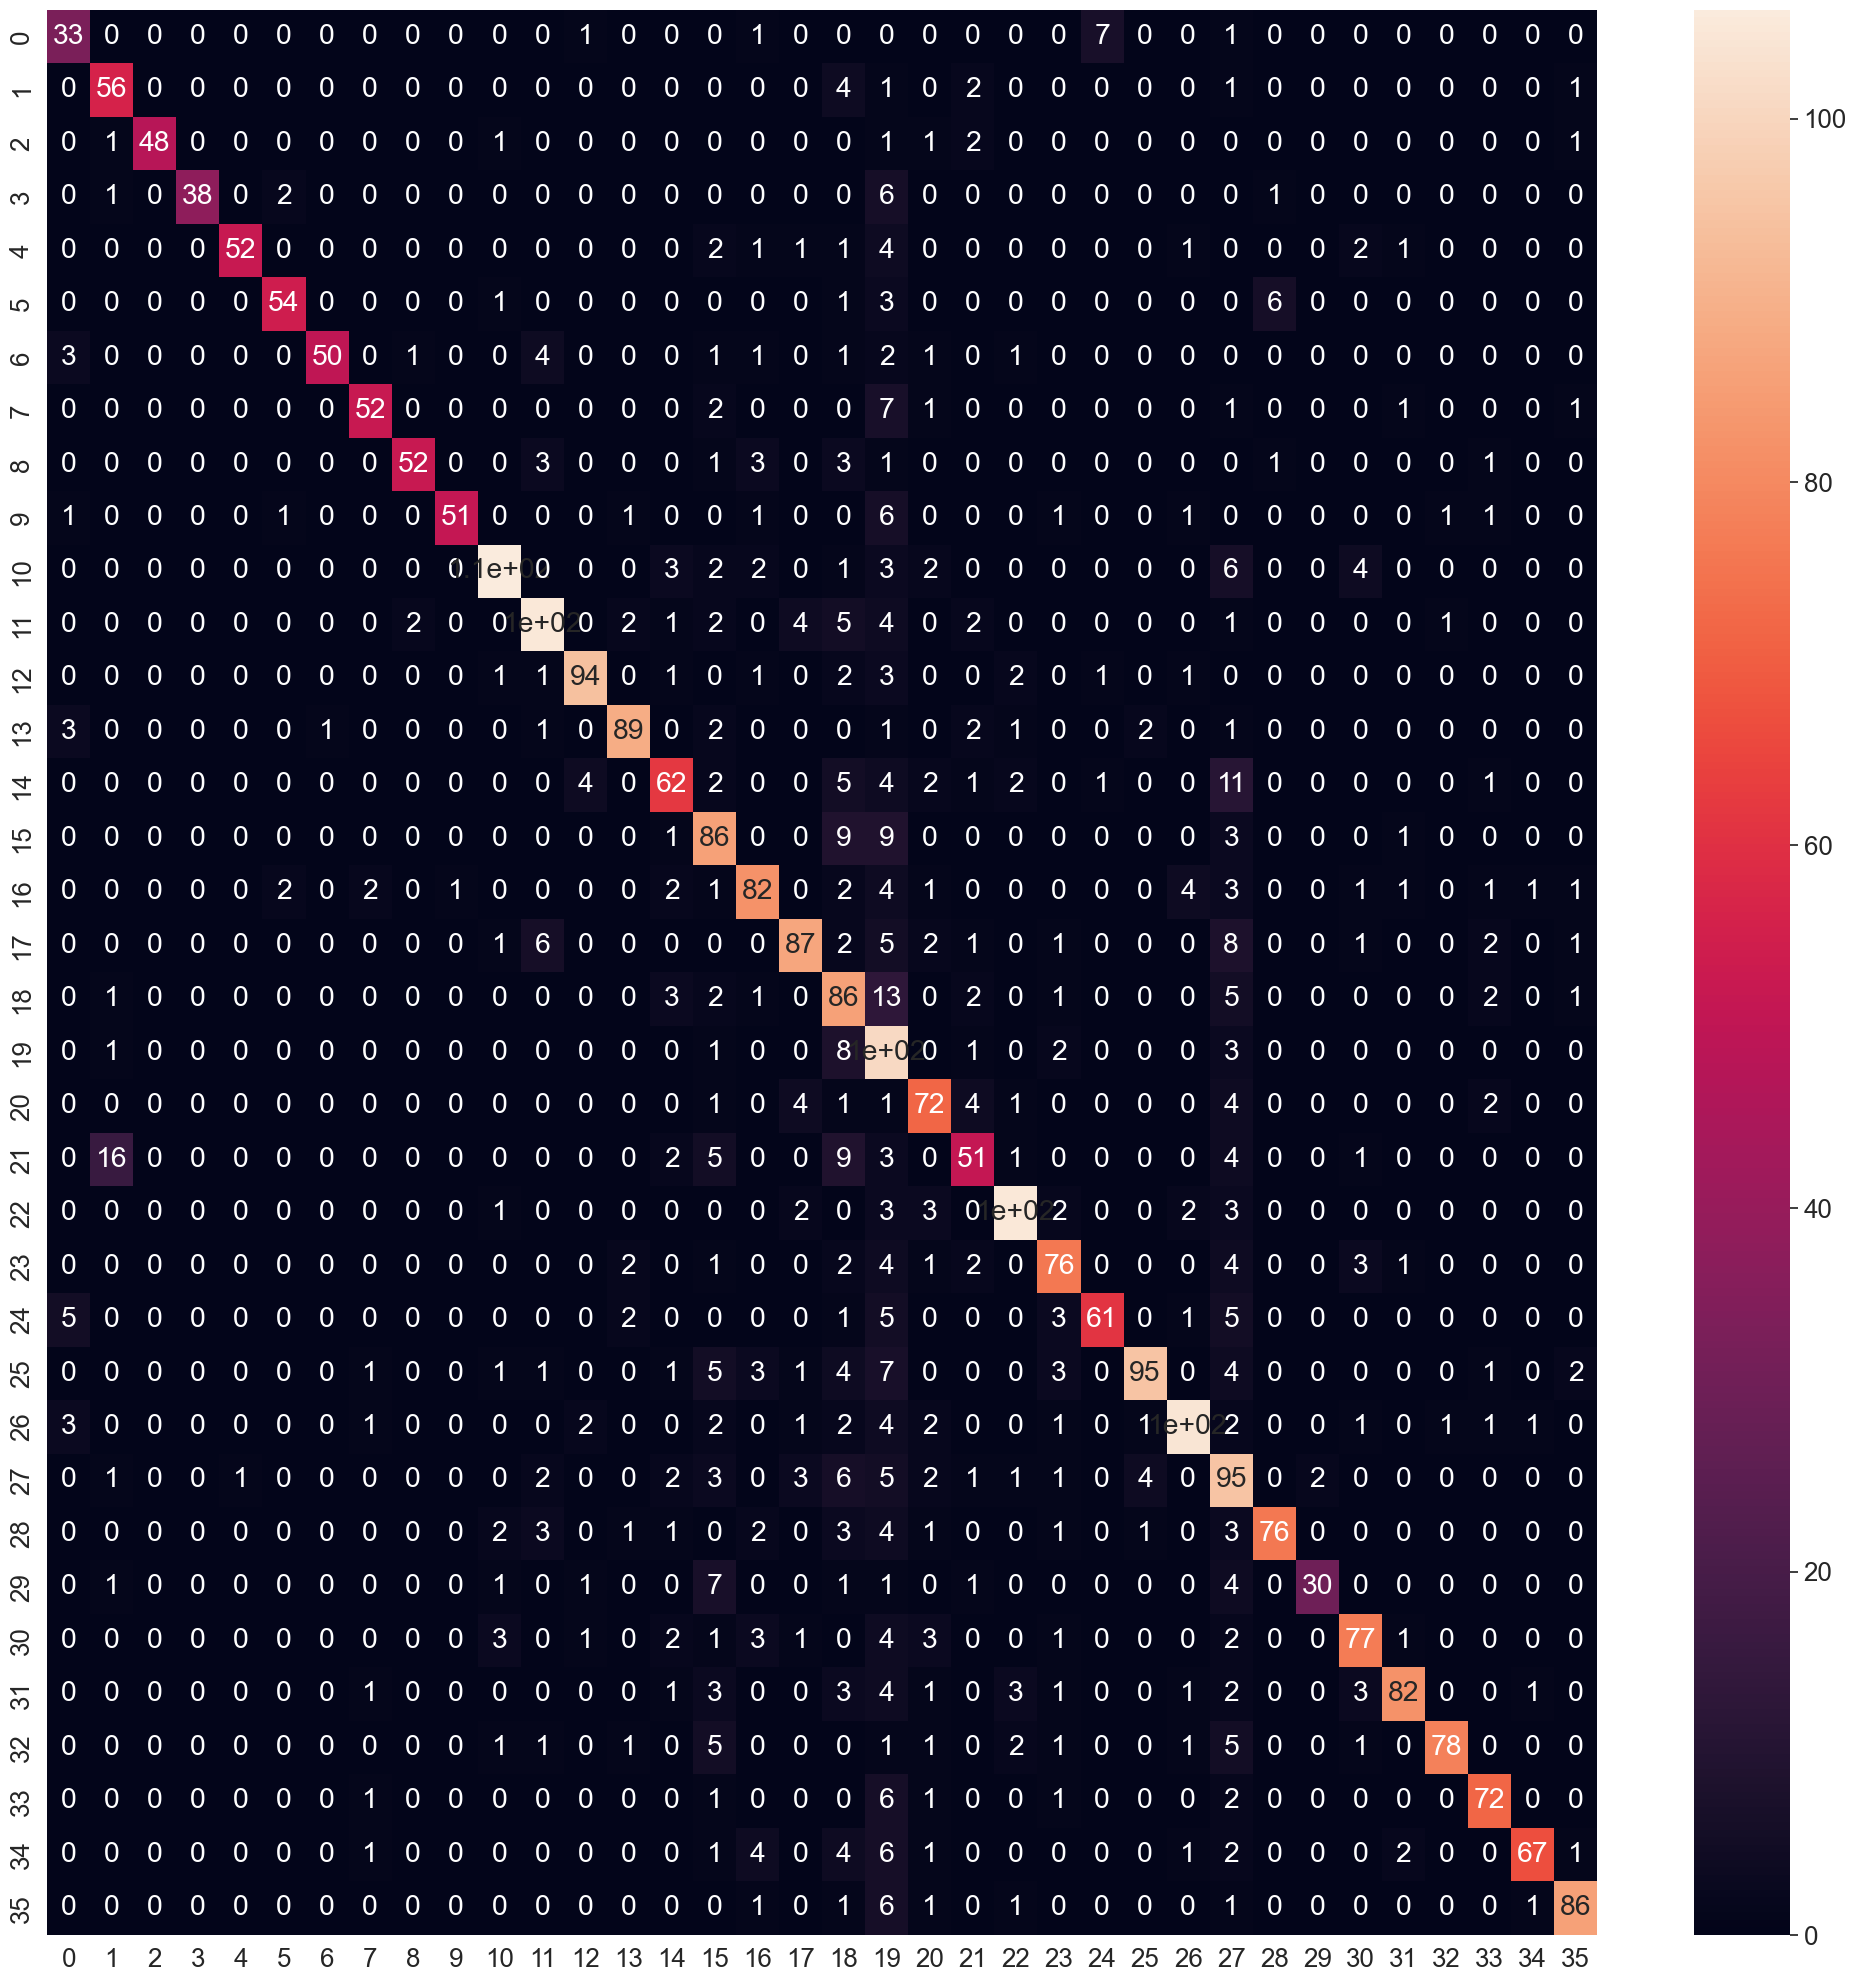

In [50]:

fig,ax=plt.subplots(figsize=(25,25))
sns.set(font_scale=1.7)
sns.heatmap(cm,annot=True,ax=ax)

# Prediction randomly

E:\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



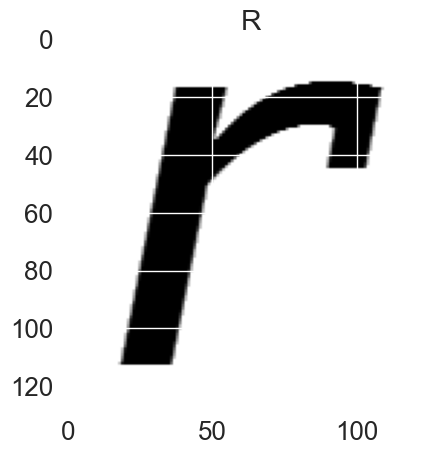

In [53]:

  n=random.randint(0,x_test.shape[0]-1)
  im=x_test[n]
  plt.imshow(im)
  plt.title(yte_img[n])
  n_im=np.expand_dims(im,axis=0)
  n_im_fe=np.expand_dims(n_im,axis=0)
  n_im_fe_re=np.reshape(n_im_fe,(n_im.shape[0],-1))
  im_predi=model.predict(n_im_fe_re)
  im_predi=le.inverse_transform([im_predi])

actual = R
prediction ['R']


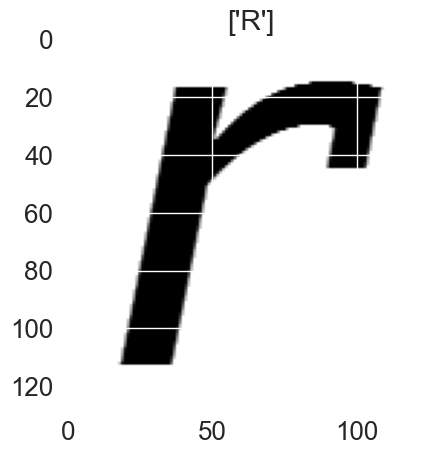

In [54]:
plt.imshow(im)
plt.title(im_predi)
print("actual =",yte_img[n])
print("prediction",im_predi)

In [56]:
#print('model Test Score is : ' , m.score(Xp, y_test)) 
#7asbi alah w n3ma elwkellll....

model Test Score is :  0.22245635159542446
